In [1]:
library("dplyr")
library("readr")
library("tidyr")
library("ggplot2")
library("stringr")
library("ggpubr")
library("GGally")
library("lubridate");


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggpubr' was built under R version 4.4.2"
Warning message:
"package 'GGally' was built under R version 4.4.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'lubridate' was built under R version 4.4.2"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




# IRIS data
Start by reading data about difference Iris flowers from the .csv file.

In [2]:

iris_df<-read_csv(file = "data/IRIS.csv",show_col_types = FALSE);

To visualize and explore the dataset we start by making two scatterplots, one with sepal-and petal length as the x and y axis respectivly. In the other plot we instead have sepal-and petal width on the x and y axes respectivly. In both plots the color corresponds to the species of flower.


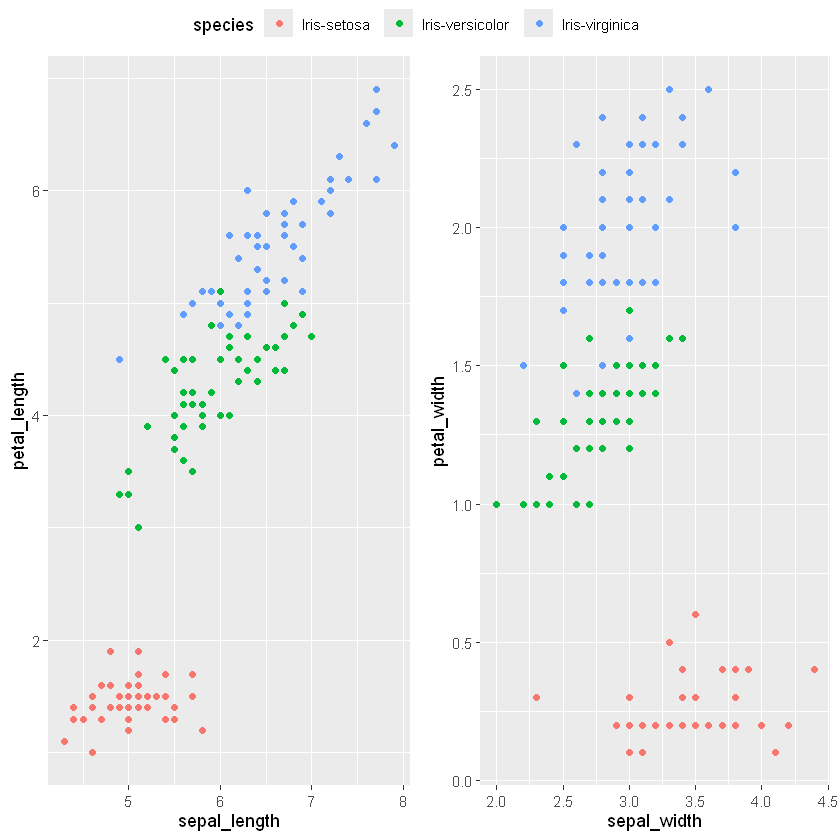

In [3]:
length_plot<-ggplot(data=iris_df)+geom_point(mapping=aes(x=sepal_length,y=petal_length,color=species))
width_plot<-ggplot(data=iris_df)+geom_point(mapping=aes(x=sepal_width,y=petal_width,color=species))
ggarrange(length_plot,width_plot,nrow=1,ncol=2,common.legend = TRUE)

From these plots we can explore the correlation between sepal-and petal length as well as sepal-and petal width. 
It seems that there is some positive correlation between both petal-and sepal length as well as width for the species Versicolor and Virginica.
But for the species Setosa there is far less spread and both petal length and width seem to be small independant of the sepal dimensions, which indicates that there is hardly any correlation between petal and sepal dimensions.


To roughly understand the distribution of these four characteristics a bar plot for each of them is made, where once again the color corresponds to species. From the barplots we can read the median and the lower and upper quantiles, which can give us both a measure of location and dispersion.

Before these distributions can be analyzed the plots first have to be made.

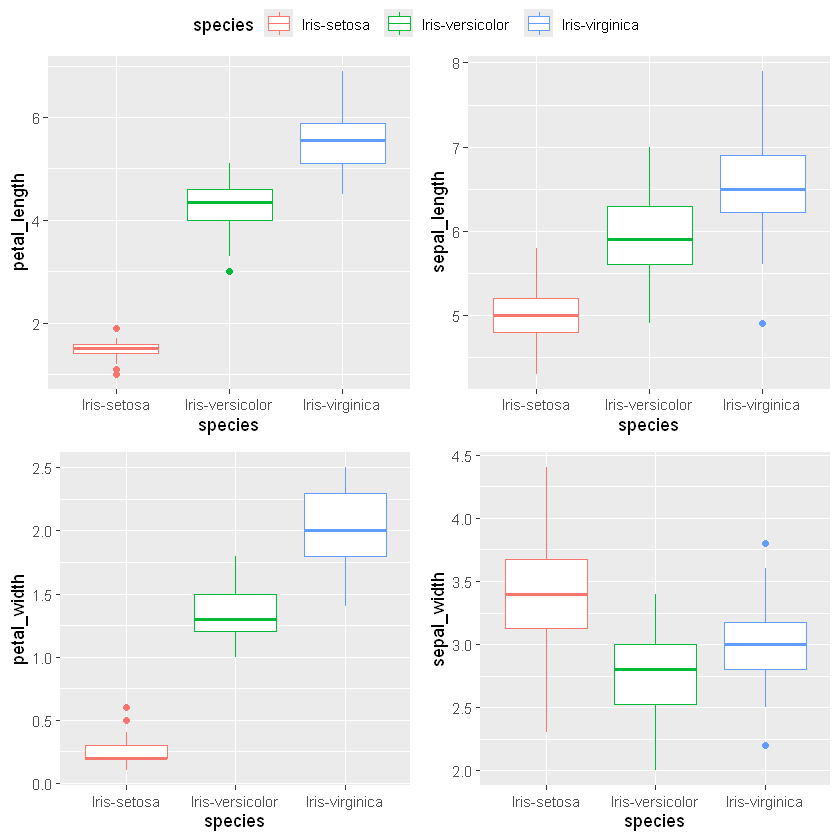

In [4]:
pl_plot<-ggplot(data=iris_df)+geom_boxplot(mapping=aes(x=species,y=petal_length,color=species))
sl_plot<-ggplot(data=iris_df)+geom_boxplot(mapping=aes(x=species,y=sepal_length,color=species))
pw_plot<-ggplot(data=iris_df)+geom_boxplot(mapping=aes(x=species,y=petal_width,color=species))
sw_plot<-ggplot(data=iris_df)+geom_boxplot(mapping=aes(x=species,y=sepal_width,color=species))
ggarrange(pl_plot,sl_plot,pw_plot,sw_plot,nrow=2,ncol=2,common.legend = TRUE)

We can as excpected see that the barplot agrees with the scatterplot as the petal dimension are far smaller for Setosa then the two other species.
For all dimensions except sepal width it seems that Virginica is the largest species followed by Versicolor and the smallest being Setosa.

To further explore correlation and other pairwise relationships between the characteristics of the different species we create a pair plot.


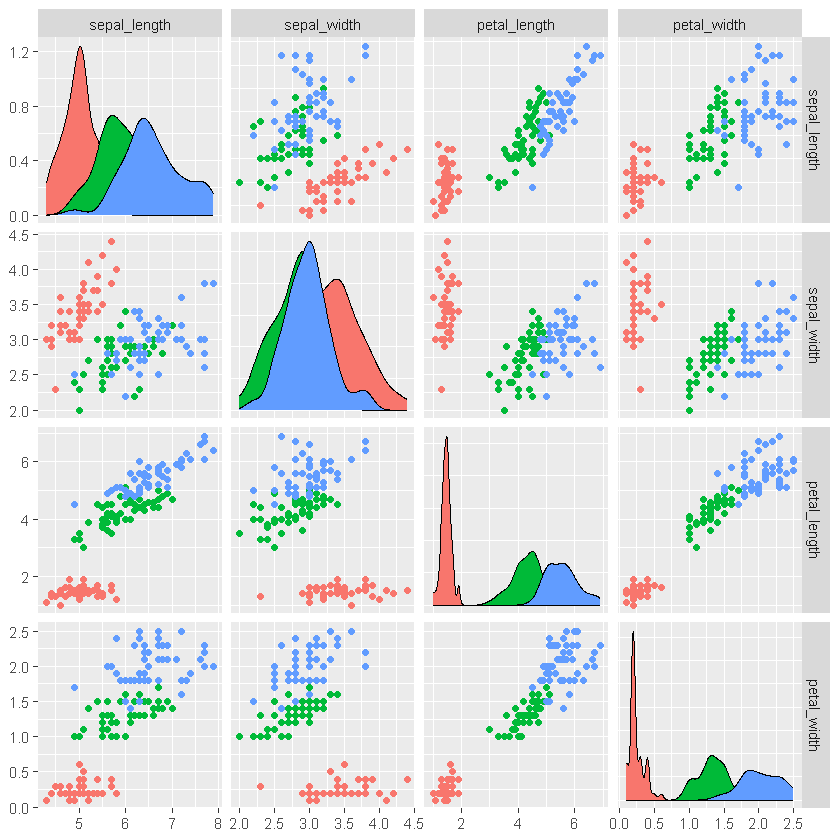

In [5]:
ggpairs(data=iris_df,
columns=1:4,
upper = list(continuous = "points", combo = "box_no_facet", discrete = "count", na = "na"),
  lower = list(continuous = "points", combo = "facethist", discrete = "facetbar", na =
    "na"),
  diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag"),
mapping=aes(color=species))

From this plot we can see that sepal width seems to be positively correlated with sepal length for all three species, we can also see an indication that the correlation between petal width and length also is positive. We can also confirm that this plot agrees with the observations made about the previous plots.

# Birdwatching
First we start by reading the data from the .csv file, thereafter we clean the data by first filtering on all events with a start date between January 1st 2022 and 2023 aswell as removing all non numeric counts (i.e the Antal column). After this we can convert the count column Antal to numeric and select only the columns of interest.


In [6]:
art_df<-read_csv("data/artportalen.csv",show_col_types = FALSE)
art_df<-art_df%>%filter(Startdatum>="2022-01-01"&Startdatum<="2023-01-01",Antal!="noterad"&Antal!="Ej återfunnen")%>%mutate(Antal=parse_number(Antal))%>%select(Startdatum,Artnamn,Antal)


Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


To determine the most prevalent species overall we can firstly limit the scope to the 15 most prevalent species to make the resulting table easier to interprete. Then the column Andel containing the share of total observations can be added to the dataframe, finally we can group the observations by species and sum up the shares and counts of each individual observation.

In [7]:
prevalence_df<-art_df%>%mutate(Andel=Antal/sum(Antal))%>%group_by(Artnamn)%>%summarise(Andel=sum(Andel),Antal=sum(Antal))%>%arrange(desc(Andel))
prevalence_df%>%filter(min_rank(desc(Andel))<=15)

Artnamn,Andel,Antal
<chr>,<dbl>,<dbl>
Grönsiska,0.17454423,20211
Sothöna,0.07174872,8308
Gräsand,0.06189493,7167
Storskrake,0.05829368,6750
Vitkindad gås,0.05479606,6345
Storskarv,0.04560725,5281
Björktrast,0.02740235,3173
Koltrast,0.02374928,2750
Vigg,0.02051074,2375


From this table we can see that Grönsiska is by far the most prevalent species, having more than double the observations of the second most prevalent species Sothöna.

To further investigate the data we can look at the monthly observations of the three most prevalent species both in a table and in a plot.

We can start by creating a new dataframe 

In [8]:

monthly_df<-art_df%>%
mutate(Month=month(Startdatum,label=TRUE,abbr=FALSE))%>%
filter(Artnamn =="Grönsiska"|Artnamn=="Sothöna"|Artnamn=="Gräsand")%>%
select(Artnamn,Antal,Month)%>%
group_by(Month,Artnamn)%>%summarise(antal=sum(Antal))
monthly_df;

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


Month,Artnamn,antal
<ord>,<chr>,<dbl>
januari,Gräsand,2953
januari,Grönsiska,19507
januari,Sothöna,2142
februari,Gräsand,1583
februari,Grönsiska,648
februari,Sothöna,2100
mars,Gräsand,1152
mars,Grönsiska,33
mars,Sothöna,3052


From the table we can see that  for all of the three species there are more observations at the start of the year then at the end. To aid in understanding the distribution we make a bar plot by month where color corresponds to species and the height corresponds to the observed amount of that species.


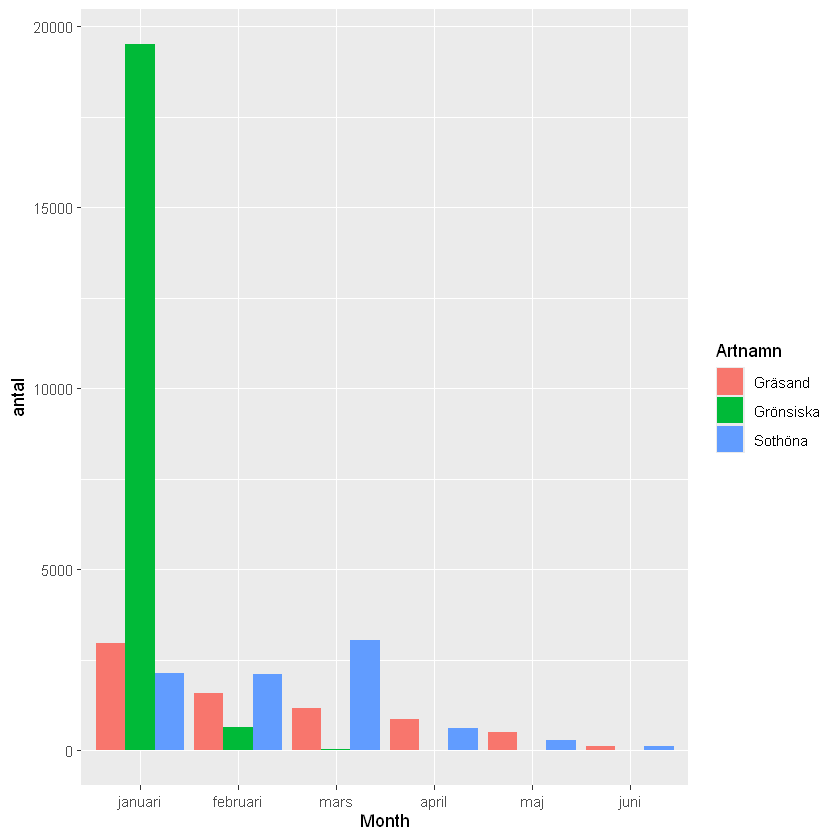

In [9]:
ggplot(data=monthly_df,aes(fill=Artnamn,y=antal,x=Month))+geom_bar(position = "dodge",stat="identity")

This plot seems to confirm that the observations start to decrease at least by april. But also that the Species Grönsiska was observed almost exclusively in January.

To find the rarest three species we can filter the data by min rank and arrange Andel in increasing order

In [10]:
prevalence_df%>%filter(min_rank(Andel)<=3)%>%arrange(Andel)

Artnamn,Andel,Antal
<chr>,<dbl>,<dbl>
Bivråk,8.636101e-06,1
Bändelkorsnäbb,8.636101e-06,1
Ejder,8.636101e-06,1
Fjällvråk,8.636101e-06,1
Forsärla,8.636101e-06,1
Gravand,8.636101e-06,1
Lappsparv,8.636101e-06,1
"Ormvråk, underarten buteo",8.636101e-06,1
Rosenfink,8.636101e-06,1


It turns out that there are alot of species where only one observation has been made which would make them equally rare, but some examples are Bivråk, Storlom and Tornfalk.

As there were a very large amount of the species Grönsiska observed at the beginning of the year, how would the most prevalent species change if we excluded all observations where more than 500 individuals where observed at one time.

In [11]:
modified_prev_df<-art_df%>%filter(Antal<=500)%>%mutate(Andel=Antal/sum(Antal))%>%group_by(Artnamn)%>%summarise(Andel=sum(Andel),Antal=sum(Antal))%>%arrange(desc(Andel))
modified_prev_df%>%filter(min_rank(desc(Andel))<=15)


Artnamn,Andel,Antal
<chr>,<dbl>,<dbl>
Sothöna,0.08449701,8308
Gräsand,0.07289241,7167
Storskrake,0.06865128,6750
Vitkindad gås,0.06453221,6345
Grönsiska,0.05198173,5111
Storskarv,0.03570884,3511
Koltrast,0.02796904,2750
Björktrast,0.02616885,2573
Vigg,0.02415508,2375


As the difference between the amount of observations of Grönsiska and other species was very large it is not really surprising to see that it is no longer the most prevalent species.
Altough Sothöna and Gräsand are still the most observed species and the third most observed species was Storskrake. Further investigating the data we find that on one occasion 3000 Grönsiska were observed with the comment "Uppskattat antal när de lättade från alarna, hägerkolonin, delade upp sig. Det kan mycket väl ha varit 5 000 ex." which very roughly translates to "Estimated amount when they flew, they could just have well been 5000". Looking a little further another very large observation of 10000 Grönsiska was found this one by the same person who reported the previously mentioned observation. This could mean that some people on average overestimate the amount of birds they saw. 

As such overestimates could make conclusions made with the data unreliable the next thing investigated is how the amount of reported observations differ between different people.

To start of the data was grouped by the column Rapportör and then the columns of interest i.e Rapportör and Antal were selected, lastly the column Medelantal containg the mean number of observations for that person was created

After the data was proccessed we can plot it in a histogram together with a vertical line at the mean number of observations

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


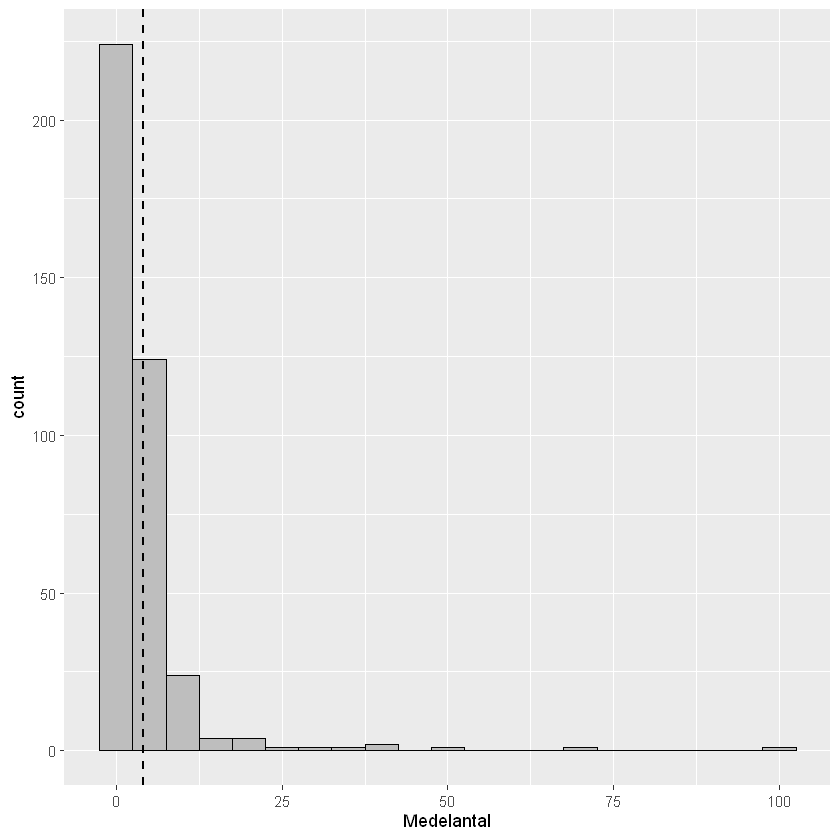

In [12]:
reporter_df<-read_csv("data/artportalen.csv",show_col_types=FALSE)
reporter_df<-reporter_df%>%filter(Startdatum>="2022-01-01"&Startdatum<="2023-01-01",Antal!="noterad"&Antal!="Ej återfunnen")%>%mutate(Antal=parse_number(Antal))%>%group_by(Rapportör)%>%select(Rapportör,Antal)%>%summarise(Medelantal=mean(Antal))
ggplot(data=reporter_df,mapping= aes(x=Medelantal))+geom_histogram(color="black", fill="gray",binwidth=5)+ geom_vline(aes(xintercept=mean(Medelantal)),
            color="black", linetype="dashed", size=.8)
            

Looking at the plot we can see that the average amount that a person reports that they observed is close to one and far less than the 3000 or 10000 that the person mentioned earlier had observed. This means that something should probably be done to account for these outlying observations if any real conclusions are to be drawn from the data.

The last thing we will investigate is how the most prevalent species change if we exclude  the people with the highest 20 ranks of average reported amount are excluded from the data.

In [13]:

overestimator_df<-reporter_df%>%filter(min_rank(desc(Medelantal))<=20)
mod_art_df<-read_csv("data/artportalen.csv",show_col_types=FALSE)
mod_art_df<-mod_art_df%>%filter(Startdatum>="2022-01-01"&Startdatum<="2023-01-01",Antal!="noterad"&Antal!="Ej återfunnen",!Rapportör%in% overestimator_df$`Rapportör`)%>%mutate(Antal=parse_number(Antal))%>%select(Startdatum,Artnamn,Antal)
mod_prev_df<-mod_art_df%>%mutate(Andel=Antal/sum(Antal))%>%group_by(Artnamn)%>%summarise(Andel=sum(Andel),Antal=sum(Antal))%>%arrange(desc(Andel))
mod_prev_df%>%filter(min_rank(desc(Andel))<=15)



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


Artnamn,Andel,Antal
<chr>,<dbl>,<dbl>
Grönsiska,0.18247308,19960
Sothöna,0.06198234,6780
Storskrake,0.05809701,6355
Gräsand,0.05800559,6345
Vitkindad gås,0.05438539,5949
Storskarv,0.04624906,5059
Björktrast,0.02814803,3079
Koltrast,0.02492092,2726
Gråhäger,0.02051451,2244


From this table we can se that Grönsiska once again is the most prevalent but that Gräsand is no longer in the top three and has been replaced by Storskrake. This tells us that we will get different results based on what way we choose to exclude outliers from the data. Perhaps excluding all observations over a specific amount together with some of the suspected overestimators would give the best result.

# Stroke data
We will now explore some data about strokes, we once again start by reading the file and then we make summary about the contents of the dataset grouped by if the individual had a stroke or not. 

In [14]:
stroke_df<-read_csv("data/stroke-data.csv",col_types = cols(age=col_double(),gender=col_factor(),hypertension=col_logical(),heart_disease=col_logical(),work_type=col_factor(),Residence_type=col_factor(),avg_glucose_level=col_double(),bmi=col_double(),smoking_status=col_factor(levels = c("never smoked","formerly smoked","smokes")),stroke=col_logical()),na=c("N/A","Unknown"))#%>%mutate(bmi=parse_double(bmi,na=c("N/A")))%>%select(gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke)


stroke_df<-stroke_df%>%mutate(ever_married=as.logical(ifelse(test = ever_married=="Yes",yes = 1,no = 0)))%>%select(gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke)

stroke_df%>%group_by(stroke)%>%summarise(mean_age=mean(age),
    male_percentage=sum(gender=="Male")/sum(gender=="Male"|gender=="Female"),
    hypertension_percentage=sum(hypertension)/sum(hypertension+!hypertension),
    heart_disease_percentage=sum(heart_disease)/sum(heart_disease+!heart_disease),
    ever_married_percentage=sum(ever_married)/sum(ever_married+!ever_married),
    mean_glucose=mean(avg_glucose_level),
    mean_bmi=mean(bmi,na.rm = TRUE),
    smokes_percentage=sum(smoking_status=="smokes",na.rm = TRUE)/(sum(smoking_status=="smokes"|smoking_status=="never smoked"|smoking_status=="formerly smoked",na.rm = TRUE)),
    never_smoked_percentage =sum(smoking_status=="never smoked",na.rm = TRUE)/(sum(smoking_status=="smokes"|smoking_status=="never smoked"|smoking_status=="formerly smoked",na.rm = TRUE)),
    formerly_smoked_percentage =sum(smoking_status=="formerly smoked",na.rm = TRUE)/(sum(smoking_status=="smokes"|smoking_status=="never smoked"|smoking_status=="formerly smoked",na.rm = TRUE)),

)



stroke,mean_age,male_percentage,hypertension_percentage,heart_disease_percentage,ever_married_percentage,mean_glucose,mean_bmi,smokes_percentage,never_smoked_percentage,formerly_smoked_percentage
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,41.97154,0.4129630,0.0888706,0.04710965,0.6445176,104.7955,28.82306,0.2220571,0.5356718,0.2422711
TRUE,67.72819,0.4337349,0.2650602,0.18875502,0.8835341,132.5447,30.47129,0.2079208,0.4455446,0.3465347


From this summary we can observe a few things, the mean age of those who suffered a stroke is higher than for those who did not, both percentage of people with hypertension-and heart disease was significantly higher for those who suffered a stroke. The average glucose level as well as bmi were also higher for those who suffered a stroke. Somewhat surprisingly the percentage of people who currently,formerly-or never smoked were about the same between the two groups. As the mean age of those who suffered a stroke was higher it was not unexpected that the group would have a higher percentage of people that were ever married.

This summary indicates to me that presence of hypertension and-or heart disease as well as increased glucose levels and bmi could increase the risk of suffering a stroke.

Therefore i will explore these visually starting with histograms of bmi and average_glucose level

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
Warning message:
"Removed 201 rows containing non-finite outside the scale range (`stat_bin()`)."


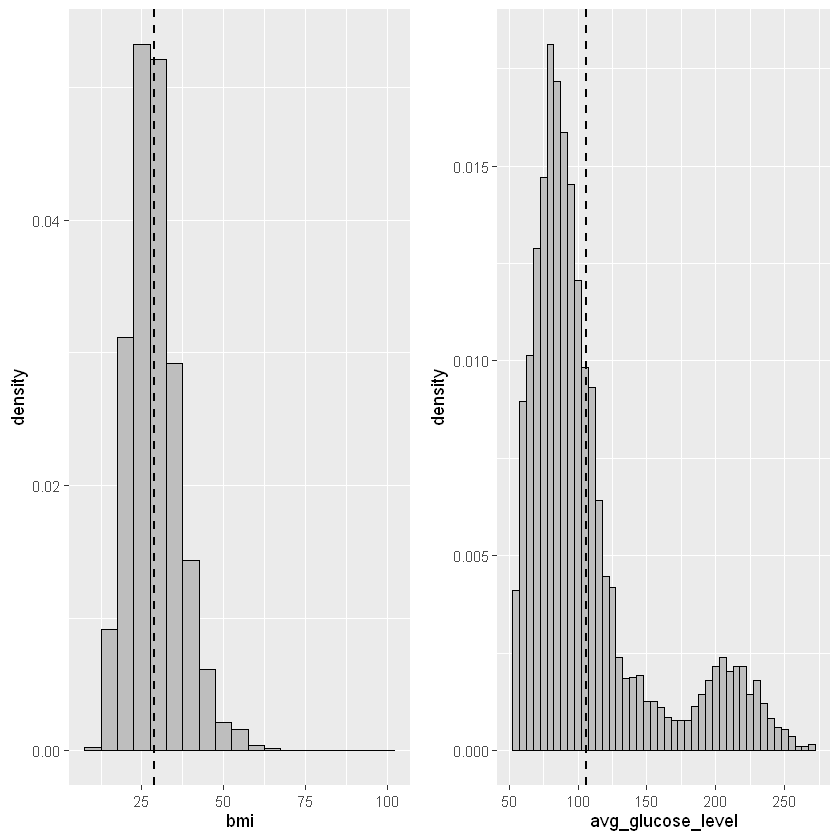

In [15]:
bmi_plt<-ggplot(data=stroke_df,mapping = aes(x=bmi,y=..density..,))+geom_histogram(color="black", fill="gray",binwidth=5)+ geom_vline(aes(xintercept=mean(bmi,na.rm = TRUE)),color="black", linetype="dashed", size=.8)
gluc_plt<-ggplot(data=stroke_df,mapping=aes(x=avg_glucose_level,y=..density..,))+geom_histogram(color="black", fill="gray",binwidth=5)+ geom_vline(aes(xintercept=mean(avg_glucose_level,na.rm = TRUE)),color="black", linetype="dashed", size=.8)


ggarrange(bmi_plt,gluc_plt,nrow=1,ncol=2)



Visually we can se that the mean of bmi for the whole dataset is around 28 and for average glucose level it is around 100, so  mean bmi for the group who suffered a stroke is just slightly above the mean for the whole sample at 30 but the average glucose level is quite alot above average.
We can also se that there is not that much spread for the bmi while the spread for the average glucose level is much higher.
Just to have something to compare with we calculate the standard error and mean of bmi for the whole sample.

In [16]:
sd(stroke_df$bmi,na.rm=TRUE) 
mean(stroke_df$bmi,na.rm=TRUE)


[1] 7.854067

[1] 28.89324

So the mean bmi for those who suffered a stroke is less than one standard deviation away from the mean of the whole dataset, which is not a very large deviation.
This leads me to look for how other variables such as gender might be correlated to average glucose level


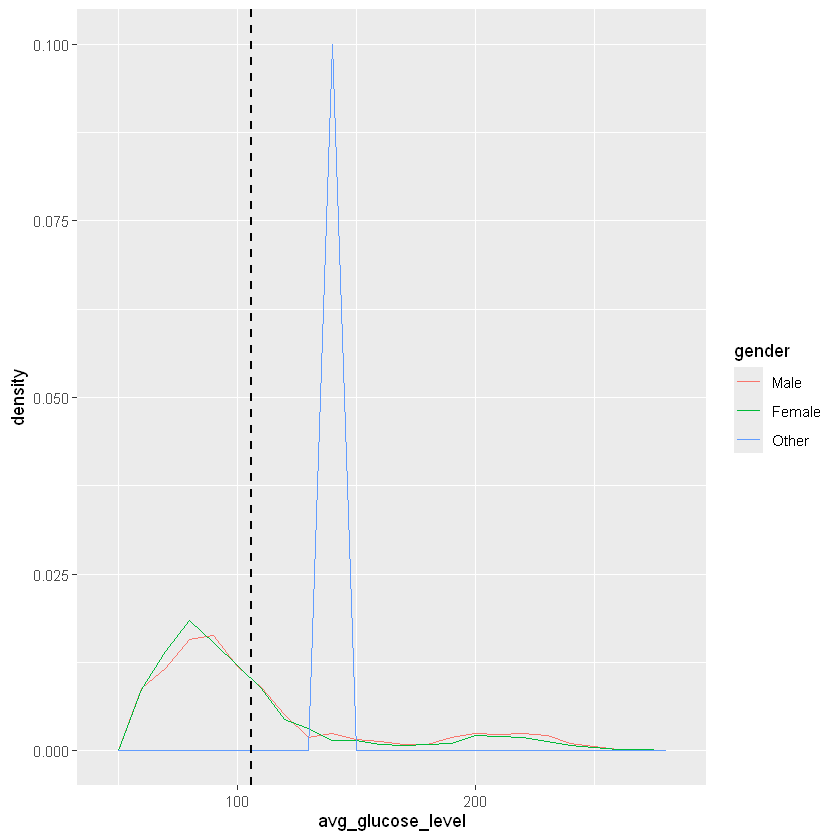

In [17]:
ggplot(data=stroke_df,mapping=aes(x=avg_glucose_level,y=..density..))+geom_freqpoly(mapping=aes(color=gender),binwidth=10)+geom_vline(aes(xintercept=mean(avg_glucose_level,na.rm = TRUE)),color="black", linetype="dashed", size=.8)

As there is only one participant with gender Other, we will disregard this individual and plot the data again as it makes the plot hard to interpret

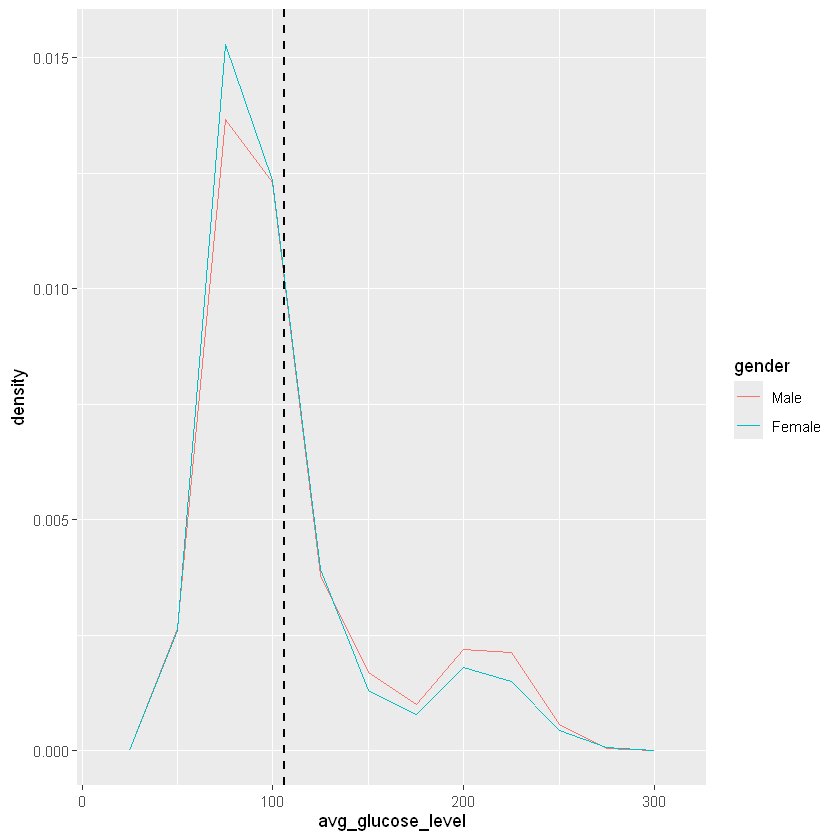

In [18]:
ggplot(data=stroke_df%>%filter(gender!="Other"),mapping=aes(x=avg_glucose_level,y=..density..))+geom_freqpoly(mapping=aes(color=gender),binwidth=25)+geom_vline(aes(xintercept=mean(avg_glucose_level,na.rm = TRUE)),color="black", linetype="dashed", size=.8)

Where we can see that there are slightly more women that have around or slightly below average and more individuals with alot above average glucose level are males.
We will redo parts the table from the start and include only people with above average average glucose level, and see how this changes the percentages.

In [19]:
stroke_df%>%filter(avg_glucose_level>mean(avg_glucose_level,na.rm = TRUE))%>%group_by(stroke)%>%summarise(mean_age=mean(age),
    male_percentage=sum(gender=="Male")/sum(gender=="Male"|gender=="Female"),
    hypertension_percentage=sum(hypertension)/sum(hypertension+!hypertension),
    heart_disease_percentage=sum(heart_disease)/sum(heart_disease+!heart_disease),
    ever_married_percentage=sum(ever_married)/sum(ever_married+!ever_married),
    mean_glucose=mean(avg_glucose_level),
    mean_bmi=mean(bmi,na.rm = TRUE),
    

)

stroke,mean_age,male_percentage,hypertension_percentage,heart_disease_percentage,ever_married_percentage,mean_glucose,mean_bmi
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,45.25512,0.4414474,0.1347798,0.06969099,0.6890204,155.2863,29.73134
TRUE,69.15447,0.4959350,0.3008130,0.27642276,0.9349593,185.1860,32.38952


From this table we can se that the mean age only slightly changed and that the percentage of males increased by 3% in those who did not suffer a stroke and by 6% in those who suffered a stroke. We can also se that the percentage of people who had a stroke and suffered from heart disease increased from around 19% to around 28% and for those who did not have a stroke it increased from around 5% to around 7%.  So there seems to be some indication that strokes are more prevalent in people with heart disease and above average glucose levels, and as slightly more men have high glucose levels the percentage of people who have high  glucose and suffer a stroke are slightly more .

# Data Preparation
As usual we start by reading the data,but this time we specify that the characters " " and "" are NA values to the read_csv function in order to explicitly handle all missing values. 


In [87]:

cellphone_df<-read_csv("data/cell_phones_total.csv",na=c(" ",""),show_col_types = FALSE)
head(cellphone_df)


iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,⋯,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ABW,0,0,NA,NA,NA,NA,0,NA,NA,⋯,132k,NA,135k,139k,140k,141k,NA,NA,NA,NA
AFG,0,0,NA,NA,NA,NA,0,NA,NA,⋯,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
AGO,0,0,NA,NA,NA,NA,0,NA,NA,⋯,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
ALB,0,0,NA,NA,NA,NA,0,NA,NA,⋯,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
AND,0,0,NA,NA,NA,NA,0,NA,NA,⋯,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
ARE,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,10.9M,11.7M,13.8M,16.1M,16.8M,17.9M,19.9M,19.8M,20.1M,19.6M


Then we define three functions used for cleaning the data, one for converting the letters k, M and B to e+03, e+06 and e+09 respectively, the second is for converting columns of type logical to type double these columns are the years 1966-1974. The last function is for converting NA to 0 this is applied for columns 1960-1979 as all countries had zero phones then so its suitable to fill missing values with zero. Lastly we fill all the remaining values by its closest neighbour from the same country.

As we dont want to apply any of these function to the column iso-3 we start by grouping by it, then in the following order
 1. Replace k,M and B with corresponding exponential format
 2. Convert all columns with datatype logical to numeric
 3. Replace all missing values from 1960-1979 with zero

Then we fill the remaining missing values.

In [88]:
k_to_expf<-function(x,na.rm=FALSE) parse_number(str_replace_all(x,c(k="e+03",M="e+06",B="e+09")))
lgl_to_num<-function(x ) as.numeric(x)
rplc_na_0<-function(x) replace_na(x,0)
cellphone_df<-cellphone_df%>%
group_by(`iso-3`)%>%
mutate_if((is.character),k_to_expf)%>%
mutate_if((is.logical),lgl_to_num)%>%
mutate_at(vars(2:17),rplc_na_0)#%>%fill(`1960`:`2019`,.direction = "downup")
cellphone_df<-as_tibble(t(zoo::na.locf(t(cellphone_df))))


`mutate_if()` ignored the following grouping variables:
• Column `iso-3`


`mutate_if()` ignored the following grouping variables:
• Column `iso-3`


In [89]:
cellphone_df%>%filter(`iso-3`%in% list("CHN","IND","USA","IDN","BRA"))%>%select(`iso-3`,`2015`,`2016`,`2017`,`2018`,`2019`)%>%arrange(match(`iso-3`,list("CHN","IND","USA","IDN","BRA")))


iso-3,2015,2016,2017,2018,2019
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CHN,1.29e+09,1.36e+09,1.47e+09,1.65e+09,1.73e+09
IND,1.00e+09,1.13e+09,1.17e+09,1.18e+09,1.15e+09
USA,3.82e+08,3.96e+08,4.00e+08,4.22e+08,4.22e+08
IDN,3.39e+08,3.86e+08,4.35e+08,3.19e+08,3.45e+08
BRA,2.58e+08,2.44e+08,2.18e+08,2.07e+08,2.07e+08
